# Beyond Word2vec
### Recent Advances in Document Embeddings
<hr>
<b>Andrew Blevins</b>
<p>Data Scientist, Metis


### About me

I teach data science at metis
<img src="images/metis.png" alt="Drawing" style="width: 100px;"/>


I used to be on the NLP and skills teams at Linkedin
<img src="images/linkedin.png" alt="Drawing" style="width: 100px;"/>

### Why document embeddings?

Anytime we need to compare or represent documents

* Search (compare query to document)
* document discovery (Compare document to document)
* have others written about this?
* match resume or profile to job-listing
* etc

Also, they might be a step towards <b>thought-vectors</b>

### Bag of words

The simplest approach is just to count up how often each word appears in the document

documents that have a lot of words in common are probably similar

![](images/bag_of_words.png)

Bag of words 
Pros
* simple and easy

Bag of words
Cons
* some words appear in all documents (a,the,this,etc)
* vectors are huge, the size of our vocabulary, could be millions
* all info contained in word order is lost
    * `the dog jumped over the fox` 
    * `the fox jumped over the dog`

### TF-IDF

TF-IDF is just a way to emphasize rare words, and ignore words that appear in all documents

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/da4be29a89f4c67ff5a8ad0c7355df1aff67a65b)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/ac67bc0f76b5b8e31e842d6b7d28f8949dab7937)

### Dimensionality Reduction

transform from many dimensions to few dimensions while losing as little information as possible

### SVD

![](images/SVD.png)

### Word2Vec

![](images/Word2vec1.png)

![](images/Word2vec2.png)

![](images/Word2vec3.png)

### pretrained word vectors

In [ ]:
#!wget https://s3.amazonaws.com/mordecai-geo/GoogleNews-vectors-negative300.bin.gz

In [36]:
import gensim
w2v = gensim.models.KeyedVectors.load_word2vec_format("~/data/GoogleNews-vectors-negative300.bin",binary=True)

2017-10-24 19:19:31,978 : INFO : loading projection weights from ~/data/GoogleNews-vectors-negative300.bin
2017-10-24 19:20:18,226 : INFO : loaded (3000000, 300) matrix from ~/data/GoogleNews-vectors-negative300.bin


### what is in a word vector

![](images/firth.jpg)

In [6]:
import nltk
import gensim
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

w2v = gensim.models.KeyedVectors.load_word2vec_format("~/data/GoogleNews-vectors-negative300.bin",binary=True)

2017-10-24 16:33:39,164 : INFO : loading projection weights from ~/data/GoogleNews-vectors-negative300.bin
2017-10-24 16:34:18,060 : INFO : loaded (3000000, 300) matrix from ~/data/GoogleNews-vectors-negative300.bin


In [37]:
w2v.most_similar(positive=['woman', 'king'], negative=['man'], topn=10)

2017-10-24 19:21:57,920 : INFO : precomputing L2-norms of word weight vectors


[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

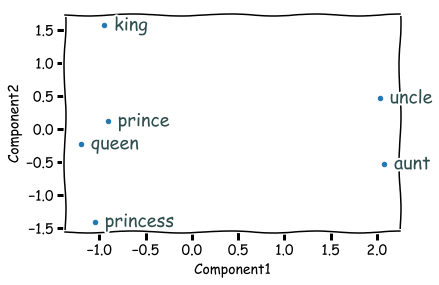

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


import pandas as pd
from sklearn.decomposition import PCA


words= ['king','queen','prince','princess', 'uncle', 'aunt']

def plot_words(words):
    word_vecs = [w2v[word] for word in words]
    pca = PCA(n_components=2)

    columns = ["Component1","Component2"]
    df = pd.DataFrame(pca.fit_transform(word_vecs), columns=columns, index=words)
    def annotate_df(row):  
        ax.annotate(row.name, list(row.values),
                    xytext=(10,-5), 
                    textcoords='offset points',
                    size=18, 
                    color='darkslategrey')
    with plt.xkcd():
        ax = df.plot(kind="scatter",x='Component1', y='Component2',)
        _ = df.apply(annotate_df, axis=1)

plot_words(words)

In [9]:
w2v.most_similar(positive=['puppy', 'cat'], negative=['dog'], topn=10)

[('kitten', 0.7634989619255066),
 ('puppies', 0.7110899686813354),
 ('pup', 0.6929495334625244),
 ('kittens', 0.6888390183448792),
 ('cats', 0.6796488761901855),
 ('kitties', 0.6261522769927979),
 ('tabby', 0.6248785257339478),
 ('feline', 0.6239445209503174),
 ('beagle', 0.5984722375869751),
 ('tortoiseshell_cat', 0.5960986614227295)]

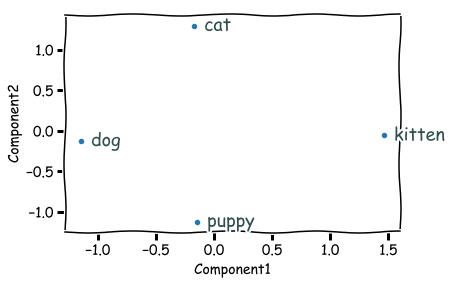

In [10]:
words= ['puppy', 'cat', 'dog','kitten']
plot_words(words)

In [11]:
w2v.most_similar(positive=['puppy', 'kittens'], negative=['kitten'], topn=10)

[('puppies', 0.8368768692016602),
 ('pups', 0.6918993592262268),
 ('dogs', 0.6844613552093506),
 ('pup', 0.6803555488586426),
 ('cats', 0.6592355370521545),
 ('Puppies', 0.6265859007835388),
 ('pets', 0.6218154430389404),
 ('dog', 0.6148011684417725),
 ('golden_retriever_puppies', 0.604468584060669),
 ('pit_bull_puppies', 0.5948553085327148)]

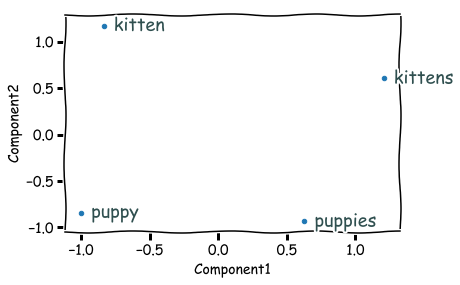

In [12]:
words= ['puppy', 'kittens', 'puppies','kitten']
plot_words(words)

In [13]:
w2v.most_similar(positive=['puppy', 'forks'], negative=['fork'], topn=10)

[('puppies', 0.6691356897354126),
 ('kitten', 0.6192759275436401),
 ('pup', 0.6143131256103516),
 ('dog', 0.6043939590454102),
 ('dogs', 0.5791490077972412),
 ('kittens', 0.5786461234092712),
 ('Puppy', 0.5712342858314514),
 ('golden_retriever', 0.5665362477302551),
 ('Sheltie', 0.5649446249008179),
 ('goldendoodle', 0.5552847385406494)]

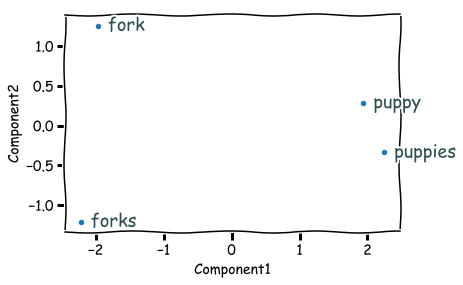

In [14]:
words= ['puppy', 'forks', 'puppies','fork']
plot_words(words)

In [15]:
w2v.most_similar(positive=['puppy', 'feet'], negative=['foot'], topn=10)

[('puppies', 0.6441149711608887),
 ('kitten', 0.6267380714416504),
 ('pup', 0.6173527240753174),
 ('dog', 0.6126686334609985),
 ('kittens', 0.5880669951438904),
 ('pooch', 0.5754020810127258),
 ('dogs', 0.5595042705535889),
 ('beagle', 0.5496172904968262),
 ('bassett_hound', 0.5457115173339844),
 ('cat', 0.5444645881652832)]

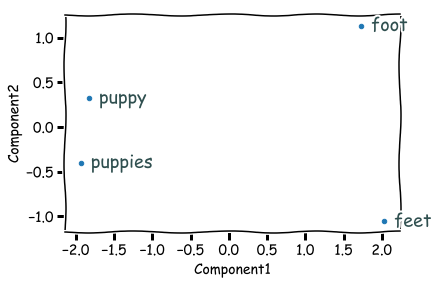

In [16]:
words= ['puppy', 'feet', 'puppies','foot']
plot_words(words)

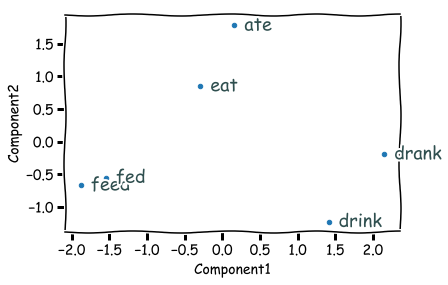

In [17]:
words= ['drink', 'feed', 'eat', 'drank','fed','ate']
plot_words(words)

In [25]:
import sense2vec

model = sense2vec.load()

In [41]:
freq, query_vector = model["Hogwarts|ORG"]
model.most_similar(query_vector, n=10)

(['Hogwarts|ORG',
  'Hogwarts|GPE',
  'Hogwarts|PERSON',
  'Hogwarts|NORP',
  'Hogwarts|NOUN',
  'McGonagall|PERSON',
  'hogwarts|NOUN',
  'wizarding_world|NOUN',
  'Dumbledore|GPE',
  'the_Ministry_of_Magic|ORG'],
 <MemoryView of 'ndarray' at 0x118ef1048>)

In [29]:
freq, query_vector = model["duck|VERB"]
model.most_similar(query_vector, n=10)

(['duck|VERB',
  'crouch|VERB',
  'ducking|VERB',
  'sprint|VERB',
  'scoot|VERB',
  'dart|VERB',
  'jump|VERB',
  'peek|VERB',
  'ducked|VERB',
  'bonk|VERB'],
 <MemoryView of 'ndarray' at 0x23e2d0890>)

### word2vec poetry

Alpha ([Alliterated Genisis by llamas and my stegosaurus](http://llamasandmystegosaurus.blogspot.com/2017/05/alpha.html) built with word2vec)

```
1. An advent: ancient archangels architect abstract astronomy and arid asteroids.  
2. All asteroids are amorphous and absent; And all asleep across aquatic anarchy. And astral angels advanced across area. 
3. And Almighty asked," Appear." And all appeared aglow. 
4. And Almighty approved. Aura and absence: an antagonistic arithmetic. 

```

* islands: aquatic archipelagos
* cowboy: colorado desperado
* Donald_Trump: stray toupee

### Word2vec improvements

* word sense
    * `duck under the door frame` vs `the duck swims around the pond`
* as guassian clouds
    * word2vec as a sort of variation autoencoder
* sub-word information
    * in the word `antidisestablishmentarianism` the ngrams:
    * **anti**,**dis**,**ment**,**rian** and **ism** contain meaning, even if you have not seen the word before
* context vectors
    * helps deal with wordsense

### evaluation considerations

intrinsic vs extrinsic evaluation (these are rarely correlated)

intrinsic
* analogy tests
* word similarity like semlex-999 or wordnet

extrinsic
* how good are these vectors for helping solve your specific use case

In [23]:
!head 'questions-words.txt'

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [20]:
# Analogy Test
w2v.accuracy("questions-words.txt")

2017-10-24 16:38:49,687 : INFO : capital-common-countries: 83.6% (423/506)
2017-10-24 16:38:54,183 : INFO : capital-world: 82.7% (1144/1383)
2017-10-24 16:38:54,591 : INFO : currency: 39.8% (51/128)
2017-10-24 16:39:02,141 : INFO : city-in-state: 74.6% (1739/2330)
2017-10-24 16:39:03,260 : INFO : family: 90.1% (308/342)
2017-10-24 16:39:05,795 : INFO : gram1-adjective-to-adverb: 32.3% (262/812)
2017-10-24 16:39:07,100 : INFO : gram2-opposite: 50.5% (192/380)
2017-10-24 16:39:11,325 : INFO : gram3-comparative: 91.9% (1224/1332)
2017-10-24 16:39:13,577 : INFO : gram4-superlative: 88.0% (618/702)
2017-10-24 16:39:16,799 : INFO : gram5-present-participle: 79.8% (694/870)
2017-10-24 16:39:20,524 : INFO : gram6-nationality-adjective: 97.1% (1193/1229)
2017-10-24 16:39:25,011 : INFO : gram7-past-tense: 66.5% (986/1482)
2017-10-24 16:39:28,022 : INFO : gram8-plural: 85.6% (849/992)
2017-10-24 16:39:30,149 : INFO : gram9-plural-verbs: 68.9% (484/702)
2017-10-24 16:39:30,150 : INFO : total: 77.1

[{'correct': [('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
   ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'),
   ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
   ('ATHENS', 'GREECE', 'BERN', 'SWITZERLAND'),
   ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'),
   ('ATHENS', 'GREECE', 'CANBERRA', 'AUSTRALIA'),
   ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'),
   ('ATHENS', 'GREECE', 'HELSINKI', 'FINLAND'),
   ('ATHENS', 'GREECE', 'ISLAMABAD', 'PAKISTAN'),
   ('ATHENS', 'GREECE', 'MADRID', 'SPAIN'),
   ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
   ('ATHENS', 'GREECE', 'OSLO', 'NORWAY'),
   ('ATHENS', 'GREECE', 'OTTAWA', 'CANADA'),
   ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
   ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
   ('ATHENS', 'GREECE', 'STOCKHOLM', 'SWEDEN'),
   ('ATHENS', 'GREECE', 'TEHRAN', 'IRAN'),
   ('ATHENS', 'GREECE', 'TOKYO', 'JAPAN'),
   ('BAGHDAD', 'IRAQ', 'BANGKOK', 'THAILAND'),
   ('BAGHDAD', 'IRAQ', 'BEIJING', 'CHINA'),
   ('BAGHDAD', 'IRAQ', 'BERLIN', 'GERMANY'),
   ('BAGHDAD', 'IRAQ', 'CAIRO', 'EG

77% is pretty good

<b>at the end of the day, extrinsic evaluation is what matters

# All that matters is how it solves your problem

### evaluation datasets


Ways of evaluating:
1. SNLI
2. paraphrase database
3. DIY
4. Webster's Dictionary?

## Document embedding techniques

### bag-of-words baseline

### LSA

### Summing wordvectors
#### AKA Centroids

![](images/wordvectors.png)

![](images/centroid.png)

![](images/centroid2.png)

![](images/centroid3.png)

![](images/centroid4.png)

![](images/centroid5.png)

![](images/centroid6.png)

![](images/centroid7.png)

![](images/centroid8.png)

![](images/centroid9.png)

![](images/centroid10.png)

![](images/centroid11.png)

### Weighting

This time we use TF-IDF weights to generate a document vector

![](images/tfidf.png)

![](images/tfidf1.png)

![](images/tfidf2.png)

![](images/tfidf3.png)

![](images/tfidf4.png)

![](images/tfidf5.png)

![](images/tfidf6.png)

![](images/tfidf7.png)

![](images/tfidf8.png)

![](images/tfidf9.png)

![](images/tfidf10.png)

### Clustering

group similar words together with some kind of clustering technique such as kmeans or a chinese restaraunt process

![](images/cluster.png)

![](images/cluster1.png)

![](images/cluster2.png)

![](images/cluster3.png)

![](images/cluster4.png)

### Parse tree representations

![](images/parse.png)

### Gensim 'doc2vec'

![](images/doc2vec.png)

In [ ]:
from gensim import 

class LabeledLineSentence(object):
    def __init__(self, filename):
        self.filename = filename
    def __iter__(self):
        for uid, line in enumerate(open(filename)):
            yield LabeledSentence(words=line.split(), labels=['SENT_%s' % uid])

model = Doc2Vec(LabeledLineSentence(sentences))

### RNNs and LSTMs

Recurrent neural networks are able to operate on sequence of items.

RNNs are able to do this because each neuron can remember its activation for the previous word
LSTMs have selective memory, allowing for longer retention of important information

![](images/rnn.png)

![](images/continuous.png)

### Fasttext 'sent2vec'

work by [Martin Jaggi](https://arxiv.org/pdf/1703.02507.pdf)


[soon to be added to Gensim](https://github.com/RaRe-Technologies/gensim/pull/1458)
with pretrained models available

very similar to word2vec, but represents an ngram of the sentence from ngrams inside the sentence

![](images/sent2vec.png)

![](images/jaggi.png)

# Doc2Vec Evaluation


#### Ways of evaluating:
1. [SNLI](https://nlp.stanford.edu/projects/snli/)
2. [Simlex-999](https://www.cl.cam.ac.uk/~fh295/simlex.html)
3. [paraphrase database](http://www.cis.upenn.edu/~ccb/ppdb/)
4. DIY

#### Document Embedding methods
1. bag of words
2. Summing Vectors
3. Clustering Vectors
4. Gensim Doc2vec
5. fasttext sent2vec
6. other options

#### word vectors
1. google news  https://code.google.com/archive/p/word2vec/  
2. glove  http://nlp.stanford.edu/projects/glove/
3. sense2vec https://github.com/explosion/sense2vec
4. fastText  https://github.com/facebookresearch/fastText/blob/master/pretrained-vectors.md
5. metaembeddings http://cistern.cis.lmu.de/meta-emb/


### SNLI

SNLI is a dataset from stanford that contains a number of possible captions for images, and crowdsources opinions over whether the captions could be describing the same image.

In [31]:
import pandas as pd

snli = pd.read_csv("/Users/ablevins/Downloads/snli_1.0/snli_1.0_test.txt", sep='\t')
snli[['gold_label','sentence1','sentence2']]

,gold_label,sentence1,sentence2
0,neutral,This church choir sings to the masses as they ...,The church has cracks in the ceiling.
1,entailment,This church choir sings to the masses as they ...,The church is filled with song.
2,contradiction,This church choir sings to the masses as they ...,A choir singing at a baseball game.
3,neutral,"A woman with a green headscarf, blue shirt and...",The woman is young.
4,entailment,"A woman with a green headscarf, blue shirt and...",The woman is very happy.
5,contradiction,"A woman with a green headscarf, blue shirt and...",The woman has been shot.
6,entailment,An old man with a package poses in front of an...,A man poses in front of an ad.
7,neutral,An old man with a package poses in front of an...,A man poses in front of an ad for beer.
8,contradiction,An old man with a package poses in front of an...,A man walks by an ad.
9,neutral,A statue at a museum that no seems to be looki...,The statue is offensive and people are mad tha...


### paraphrase database


In [32]:
columns = ['pos','phrase1','phrase2','rule','rule2']
ppdb = pd.read_csv("/Users/ablevins/Downloads/ppdb-1.0-s-phrasal", sep='\|\|\|', names=columns)
ppdb[['phrase1','phrase2']]

/Users/ablevins/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,phrase1,phrase2
0,china-u.s. and,sino-us and
1,"fast , easy and","quick , easy and"
2,"quick , easy and","fast , easy and"
3,sino-us and,china-u.s. and
4,as holy as,as sacred as
5,as sacred as,as holy as
6,especially concerned about the situation of,particularly concerned at the situation of
7,more common than,more frequent than
8,more frequent than,more common than
9,particularly concerned at the situation of,especially concerned about the situation of
